In [236]:
import numpy as np 
import matplotlib.pyplot as plt

# EJERCICIO 1 
* Comparen el resultado de hacer `0.3 + 0.25` con el de hacer `0.3 - 0.25`
  En ambos casos obtienen el resultado esperado? Por qué?
* Escriban el número 0.25 en base 2. Cómo queda expresado en términos de su mantisa y exp?
* Escriban el número 0.3 en base 2. Qué dificultades aparecen al escribir 0.3 en bianrio? Se puede escribir con una mantisa finita? (obs: hecho en pdf) 

In [239]:
print('0.3 + 0.25 =', 0.3 + 0.25)
print('0.3 - 0.25 =', 0.3 - 0.25) # este dio distinto, a mi me dio 0.05 

0.3 + 0.25 = 0.55
0.3 - 0.25 = 0.04999999999999999


In [241]:
mantissa, exp = np.frexp(np.float16(0.25))
mantissa * 2.**exp

0.25

In [243]:
mantissa, exp = np.frexp(np.float16(0.3))
mantissa * 2.**exp
# si vemos el cálculo hecho a mano notamos que el redondeo es kinda periodico así que tiene sentido que no quede un número finito acá

0.300048828125

# EJERCICIO 2 
* Cuánto da 
\begin{align*}
(\sqrt{2})^2 = 2?
\end{align*}
(obs: resultado a mano hecho en pdf)
* Para 100 valores de equispaciados x en el intervalo de [10** 4, 10** 16] evaluar que las siguientes expresiones son equivalentes y graficar. En base al gráfico obtenido identificar la opción que mejor resiste la pérdida de valores significativos

$$y = \sqrt{2x^2 + 1} - 1$$
$$y = \frac{2x^2}{\sqrt{2x^2 + 1} + 1}$$

In [246]:
print(np.sqrt(2)**2-2) # no se que pasa internamente pero no dio 0.0 finito

4.440892098500626e-16


In [248]:
raiz = np.sqrt(2) 
raiz2 = raiz ** 2 
print( raiz, '\n', raiz2, '\n', raiz2-2)
# vemos que 1.4...etc al cuadrado no da 2 finito !! por ende al restarlo con 2.0 habrá un especie de error acumulado 

1.4142135623730951 
 2.0000000000000004 
 4.440892098500626e-16


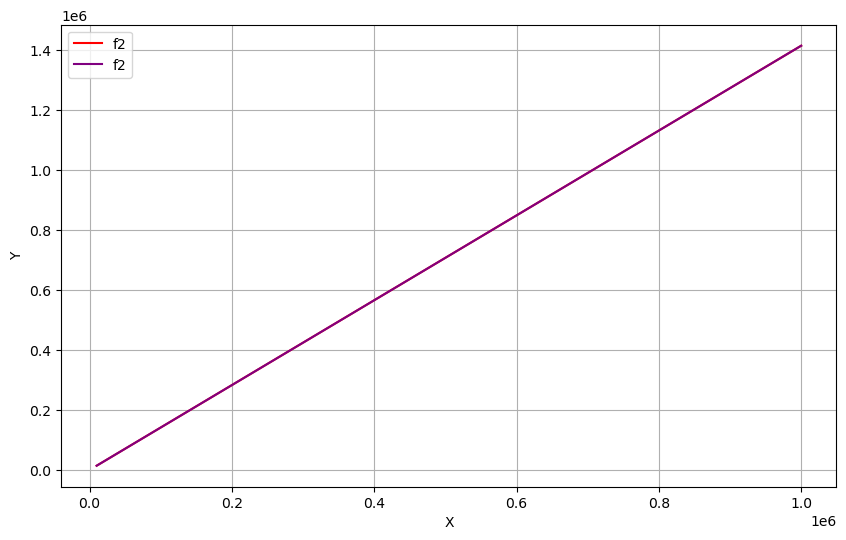

In [250]:
# Gráfico

x = np.linspace(10**4,10**6,100)
f1 = lambda t: np.sqrt(2*t**2 + 1) - 1
f2 = lambda t: 2*t**2 / np.sqrt(2*t**2 + 1)

plt.figure(figsize = (10,6))
plt.plot(x, f1(x), color='red', label='f2')
plt.plot(x, f2(x), color='purple', label='f2')


plt.xlabel('X')
plt.ylabel('Y')


plt.legend()  

plt.grid(True) 
plt.show()

# EJERCICIO 3 
* Sea la sucesión:

\begin{aligned}
x_1 &= \sqrt{2}\\
x_{n+1} &= \frac{x_n \cdot x_n}{\sqrt{2}}
\end{aligned}

Implementen una rutina que calcule el valor de Xi para i = 1,...,100 y grafiquen sus valores. En qué punto se desestabiliza la sucesión? 

In [253]:
def calcularSucesion(i):
  res = 0
  if i == 1:
    res = np.sqrt(2)
  else:
    res = (calcularSucesion(i - 1)**2) / np.sqrt(2)
  return res

#for i in range(1, 101):
#  l.append(f"{i}: {calcularSucesion(i)}") # vemos que empieza a cambiar en i = 51 y me tira inf en i = 65

l = []
for i in range(1, 101):
  l.append(calcularSucesion(i))

print(l)

[1.4142135623730951, 1.4142135623730954, 1.4142135623730956, 1.4142135623730958, 1.4142135623730965, 1.4142135623730978, 1.4142135623731007, 1.4142135623731062, 1.4142135623731173, 1.4142135623731396, 1.4142135623731837, 1.4142135623732723, 1.4142135623734495, 1.414213562373804, 1.4142135623745127, 1.4142135623759302, 1.4142135623787653, 1.4142135623844354, 1.4142135623957757, 1.4142135624184562, 1.414213562463817, 1.414213562554539, 1.4142135627359826, 1.4142135630988701, 1.4142135638246451, 1.4142135652761954, 1.4142135681792956, 1.414213573985496, 1.414213585597897, 1.4142136088226993, 1.414213655272305, 1.414213748171521, 1.414213933969971, 1.4142143055669447, 1.4142150487611849, 1.4142165351508367, 1.414219507934827, 1.4142254535215548, 1.414237344769999, 1.4142611275668442, 1.4143086943603853, 1.414403832747059, 1.4145941287202788, 1.414974797478264, 1.4157364423368823, 1.4172609621968253, 1.4203149286706944, 1.4264426181995848, 1.4387774217083105, 1.4637679373856045, 1.515058709

C:\Users\Celeste\AppData\Local\Temp\ipykernel_6572\1518212221.py:6: RuntimeWarning: overflow encountered in scalar power
  res = (calcularSucesion(i - 1)**2) / np.sqrt(2)


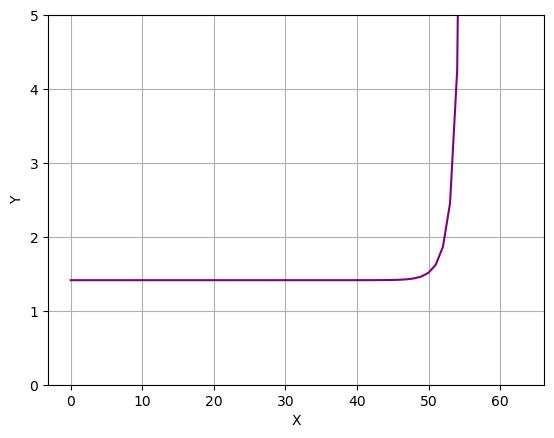

In [255]:
# Gráfico:

plt.plot(l, color = 'purple')
plt.ylim(0, 5)

# titulos de los ejes:
plt.xlabel('X')
plt.ylabel('Y')

plt.grid(True) # quiero hoja cuadriculada? 
plt.show()

# Probablemente tenga una asíntota vertical en x = 65 

# EJERCICIO 4 
Comparar el resultado de calcular:
$$\sum_{i=1}^{10^n} \frac{1}{i} \quad \text{y} \quad \sum_{i=1}^{5\cdot 10^n} \frac{1}{i}$$
para n = 6, 7 usando presición de 64 y 32 bits

In [158]:
n = 6
s = np.float64(0) 
for i in range(1,10**n+1): 
   s = s + np.float64(1/i) 
print('suma con n = 6 y float 64:', s) 
###############################
n = 7
s = np.float64(0) 
for i in range(1,10**n+1): 
   s = s + np.float64(1/i) 
print('suma con n = 7 y float 64:', s) 
##############################
n = 6
s = np.float32(0) 
for i in range(1,10**n+1): 
   s = s + np.float32(1/i) 
print('suma con n = 6 y float 32:', s) 
###############################
n = 7
s = np.float32(0) 
for i in range(1,10**n+1): 
   s = s + np.float32(1/i) 
print('suma con n = 7 y float 32:', s) 

suma con n = 6 y float 64: 14.392726722864989
suma con n = 7 y float 64: 16.695311365857272
suma con n = 6 y float 32: 14.357358
suma con n = 7 y float 32: 15.403683


In [160]:
n = 6
s = np.float64(0)
for i in range(1,5*10**n+1):
    s = s + np.float64(1/i)
print('suma con n = 6 y float 64:', s) 
###############################
n = 7
s = np.float64(0) 
for i in range(1,5*10**n+1):
    s = s + np.float64(1/i)
print('suma con n = 7 y float 64:', s) 
##############################
n = 6
s = np.float32(0) 
for i in range(1,5*10**n+1):
    s = s + np.float32(1/i) 
print('suma con n = 6 y float 32:', s) 
###############################
n = 7
s = np.float32(0) 
for i in range(1,5*10**n+1):
    s = s + np.float32(1/i)
print('suma con n = 7 y float 32:', s) 

suma con n = 6 y float 64: 16.002164235298594
suma con n = 7 y float 64: 18.304749238293297
suma con n = 6 y float 32: 15.403683
suma con n = 7 y float 32: 15.403683


## Para pensar...
* Cuánto vale 1/i en precisión simple cuando $$ i = 2 \cdot 10^{7} ? $$
* Si escribimos 1/10**7 usando el mismo exponente que el necesario para representar a $$ \sum_{i=1}^{5\cdot 10^6} \frac{1}{i} $$ , a cuánto equivale 1/i?
* Por qué la siguiente modificación cambia el resultado?
  
s = np.float32(0)

for i in range(2∗10∗∗n,0,−1):

 s = s +np.float32(1/i)
 
print(”suma = ”, s)

# EJERCICIO 5 
Desarrollar una funcion `matricesIguales(A, B)` que devuelve `True` si ambas matrices son iguales.

La siguiente matriz $A$

$$
A=\left(\begin{array}{ccc}
4. & 2. & 1. \\ 
2. & 7. & 9. \\ 
0. & 5. & \frac{22}{3}
\end{array}\right)
$$

tiene una descomposición LU siguiente:

$$
L=\left(\begin{array}{ccc}
1. & 0. & 0. \\ 
0.5 & 1. & 0. \\ 
0. & \frac{5}{6} & 1.
\end{array}\right),
\quad
U=\left(\begin{array}{ccc}
4. & 2. & 1. \\ 
0. & 6. & 8.5 \\ 
0. & 0. & 0.25
\end{array}\right)
$$

Verificar que la función desarrollada `matricesIguales(A, L@U)` devuelva **True**.

In [258]:
def matricesIguales(A, B):
    A_lista = A.tolist()
    B_lista = B.tolist()
    if len(A) != len(B):
        return False
    res = True
    for i in range(len(A)):
        if (len(A[i]) != len(B[i])):
            res = False 
        else:
            for j in range(len(A[i])):
                if not np.allclose(A[i], B[i], rtol=1e-05, atol=1e-08):
                    res = False 
    return res 
# uso np.allclose porque podrian ser solo iguales en redondo 
# ej 3.0 deberia ser igual a 3.000000056
    
A = np.array([[4,2,1],[2,7,9],[0,5,22/3]])
B = np.array([[4,2,1],[2,7,9],[0,5,22/3]])
L = np.array([[1,0,0],[0.5,1,0],[0,5/6,1]])
U = np.array([[4,2,1],[0,6,8.5],[0,0,0.25]])

LU = L@U
print(LU, '\n','\n', A) # vemos que son iguales 
print('Son iguales A y L@U?', matricesIguales(A, LU)) # no me salio que bronca
print('Son iguales A y B?', matricesIguales(A, B))

[[4.         2.         1.        ]
 [2.         7.         9.        ]
 [0.         5.         7.33333333]] 
 
 [[4.         2.         1.        ]
 [2.         7.         9.        ]
 [0.         5.         7.33333333]]
Son iguales A y L@U? True
Son iguales A y B? True


# EJERCICIO 6 
Verificar qué devuelve la función esSimetrica() desarrollada para el laboratorio pasado en los siguientes casos. Para una A = np.array(np.random.rand(4,4))
- `esSimetrica(`$A^T Q A$`)`

- `esSimetrica(`$A^T Q_{4.0}^{0.25}$`)`

- `esSimetrica(`$A^T Q_{0.2}^{4.0}$`)`

In [ ]:
# Función esSimetrica: 
def esSimetrica(A):
    A_traspuesta = traspuesta(A)
    res = True 
    for i in range(len(A)): 
        for j in range(len(A)): 
            if A[i][j] != A_traspuesta[i][j]:
                res = False 
    return res       

A = np.array(np.random.rand(4,4))

# EJERCICIOS EXTRA:

**Ejercicio 7.** _Ángulos mínimos_ Usando $\epsilon$ de máquina, estimar el error en el ángulo entre $E_{1}=(1,0,\ldots,0)$ y $v_{\gamma}=\sqrt{1-(n-1)\gamma^{2}}E_{1}+\gamma\sum_{i=2}^{n}E_{i}$.

Usar: $\cos(\theta)=\frac{a^{T}b}{\|a\|\|b\|}$

Explorar:
- $\gamma=\epsilon$, $n=1$ a $1000$
- $n=2$, $\gamma=k\epsilon$ con $k=1$ a $1000$

Comparar con el ángulo exacto.

**Ejercicio 8.** _Eso no es la identidad_ Partiendo de la matriz

$$
A = \begin{pmatrix} 
10^{-1} & 1 \\ 
0 & 1 
\end{pmatrix}
$$

- Calcular analíticamente $A^{-1}$.
- Comprobar que $AA^{-1} = I$, la matriz identidad.
- Calcular $A^n(A^{-1})^n$ para valores de $n = 1, \ldots, 100$. ¿Qué problemas de estabilidad aparecen?

# MÓDULO ALC


In [228]:
def error(x,y):
    return abs(x-y)

In [230]:
def error_relativo(x,y):
    return abs(x-y)/abs(x)

In [232]:
def matricesIguales(A, B):
    A_lista = A.tolist()
    B_lista = B.tolist()
    if len(A) != len(B):
        return False
    res = True
    for i in range(len(A)):
        if (len(A[i]) != len(B[i])):
            res = False 
        else:
            for j in range(len(A[i])):
                if not np.allclose(error(A[i],B[i]),0, atol=1e-08):
                    res = False 
    return res 

OBS: SI PASAS EL TEST Y NO DICE NADA ES PORQUE ESTÁ BIEN !! SI NO DIRIA ERROR 